In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

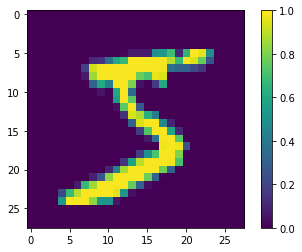

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

#### ДЗ п1:

In [48]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [49]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [50]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2533 - accuracy: 0.9269
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1098 - accuracy: 0.9674
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0739 - accuracy: 0.9778
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0571 - accuracy: 0.9826
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0437 - accuracy: 0.9863
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0340 - accuracy: 0.9892
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0283 - accuracy: 0.9912
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0222 - accuracy: 0.9931
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0191 - accuracy: 0.9942
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.015

In [51]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nТочность на проверочных данных:', test_acc)

313/313 - 0s - loss: 0.0852 - accuracy: 0.9781

Точность на проверочных данных: 0.9781000018119812


In [52]:
predictions = model.predict(test_images)

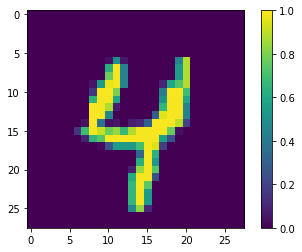

In [53]:
plt.figure()
plt.imshow(test_images[1111])
plt.colorbar()
plt.grid(False)
plt.show()

In [54]:
predictions[1111]

array([2.2809379e-19, 3.4489440e-14, 4.5261727e-14, 1.9967717e-12,
       1.0000000e+00, 1.9181515e-14, 4.2857054e-13, 8.3015310e-11,
       3.7183367e-11, 8.1258325e-09], dtype=float32)

In [55]:
np.argmax(predictions[1111])

4

accuracy ~ 0.975 test не удалось сильно увеличить ни кол-вом скрытых слоев, ни разными активационными функциями.
Максимум для самой простой модели достигается уже через 5 эпох.

#### ДЗ п3

In [84]:
model_1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

model_3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='selu'),
    keras.layers.Dense(10, activation='softmax')
])

model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [85]:
hist1=model_1.fit(train_images, train_labels, epochs=10)
hist2=model_2.fit(train_images, train_labels, epochs=10)
hist3=model_3.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1000us/step - loss: 0.2582 - accuracy: 0.9258
Epoch 2/10
1875/1875 [==============================] - 2s 990us/step - loss: 0.1152 - accuracy: 0.9656
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0793 - accuracy: 0.9762
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0589 - accuracy: 0.9819
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0462 - accuracy: 0.9859
Epoch 6/10
1875/1875 [==============================] - 2s 992us/step - loss: 0.0363 - accuracy: 0.9886
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0293 - accuracy: 0.9908
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0227 - accuracy: 0.9934
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0187 - accuracy: 0.9943
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss

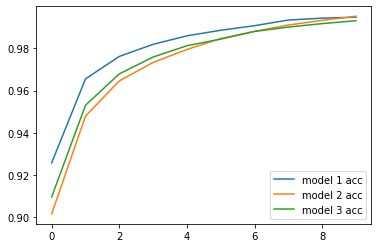

In [86]:
plt.plot(hist1.history['accuracy'],label='model 1 acc')
plt.plot(hist2.history['accuracy'],label='model 2 acc')
plt.plot(hist3.history['accuracy'],label ='model 3 acc')
plt.legend()
plt.show()

In [87]:
model_1.save_weights('model1.h5')
model_2.save_weights('model2.h5')
model_3.save_weights('model3.h5')

In [88]:
input1 = keras.layers.Input(shape=(28, 28))
x1 = keras.layers.Flatten()(input1)
x1 = keras.layers.Dense(128, activation='relu')(x1)
x1 = keras.layers.Dense(10)(x1)

model11 = keras.models.Model(inputs=input1,outputs=x1)

x2 = keras.layers.Flatten()(input1)
x2 = keras.layers.Dense(256, activation='sigmoid')(x2)
x2 = keras.layers.Dense(10)(x2)

model22 = keras.models.Model(inputs=input1,outputs=x2)

x3 = keras.layers.Flatten()(input1)
x3 = keras.layers.Dense(256, activation='selu')(x3)
x3 = keras.layers.Dense(10)(x3)

model33 = keras.models.Model(inputs=input1,outputs=x3)

model11.load_weights('model1.h5')
model22.load_weights('model2.h5')
model33.load_weights('model3.h5')

out_all = keras.layers.Average()([model11.output,model22.output,model33.output])
out_all = keras.layers.Softmax()(out_all)
model_all = keras.models.Model(inputs =[input1],outputs =out_all)

In [89]:
model_all.summary()

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten_24 (Flatten)            (None, 784)          0           input_3[0][0]                    
__________________________________________________________________________________________________
flatten_25 (Flatten)            (None, 784)          0           input_3[0][0]                    
__________________________________________________________________________________________________
flatten_26 (Flatten)            (None, 784)          0           input_3[0][0]                    
___________________________________________________________________________________________

In [90]:
model_all.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [91]:
img = (np.expand_dims(test_images[1111],0))

In [92]:
prediction_4 = model_all.predict(img)
prediction_4

array([[9.2881398e-15, 1.1760948e-13, 1.3423134e-12, 4.4622548e-12,
        9.9999762e-01, 3.6046467e-12, 9.0909060e-12, 3.9976271e-09,
        3.9881051e-10, 2.3685689e-06]], dtype=float32)

In [93]:
np.argmax(prediction_4)

4